In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [154]:
# creating random dataset with scikit-learn

X, y = make_regression(n_samples=70, n_features=1, noise=20)

In [155]:
# scale the data points to 24

x_min, x_max = 0, 50  # study time - weekly
y_min, y_max = 0, 100 # exam score

X_scaled = np.interp(X, (X.min(), X.max()), (x_min, x_max))
y_scaled = np.interp(y, (y.min(), y.max()), (y_min, y_max))

X = X_scaled
y = y_scaled


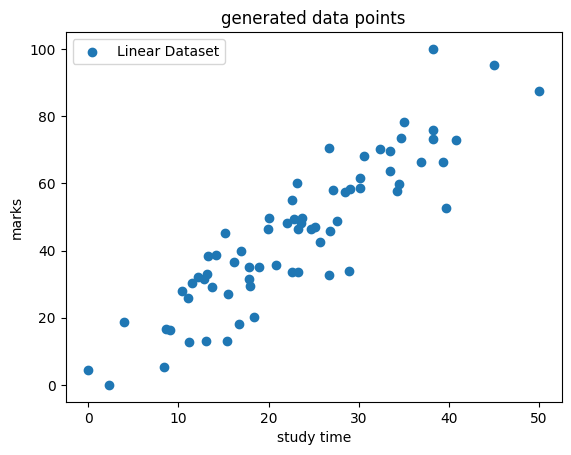

In [156]:
# plot the dataset points

plt.scatter(X, y, label='Linear Dataset')
plt.xlabel('study time')
plt.ylabel('marks')
plt.title('generated data points')
plt.legend()
plt.show()

## Loss Function (will not use)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*jezHPOSWw15WSUPxa7kqcg.png" alt="error function" width="500"/>



In [157]:
def error_function(m,b,x,y):
    for i in range(len(x)):
        total_error += (y - ( m * x + b )) ** 2
    total_error = total_error / len(x)
    return total_error

## Gradient Descent  

Taking Partial Derivates of Error Function wrt to m and b  
<img src="https://www.ejable.com/wp-content/uploads/2022/04/gradient-descent-2.webp" alt="gradient descent" width="500"/>

In [158]:
def gradient_descent(m_now, b_now, data_x ,data_y, L):
    m_gradient = 0
    b_gradient = 0

    n = len(data_x)

    for i in range(n):
        X = data_x[i]
        y = data_y[i]

        m_gradient += -(1/n) * X * ( y - (m_now * X + b_now))
        b_gradient += -(1/n) * ( y - (m_now * X + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

In [159]:
# using the gradient descent 

m = 0
b = 0
L = 0.0001 # Learning rate
epochs = 150

for i in range(epochs):
    m, b = gradient_descent(m, b, X, y, L)

## Plotting the line

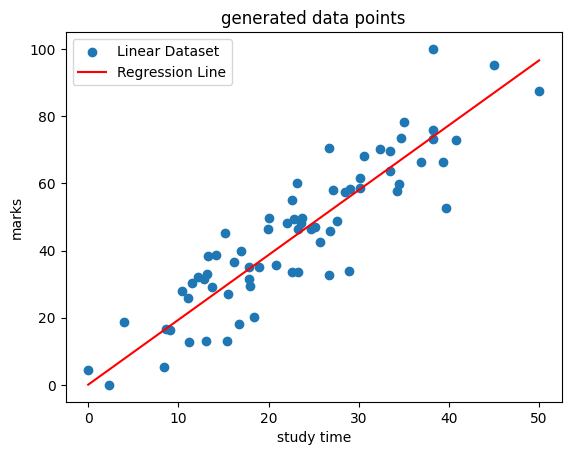

In [160]:
plt.scatter(X, y, label='Linear Dataset')
# Generate a range of x-values for the regression line
x_range = np.linspace(x_min, x_max, 100)
# Calculate the corresponding y-values using the line equation y = mx + b
y_range = m * x_range + b
# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.xlabel('study time')
plt.ylabel('marks')
plt.title('generated data points')
plt.legend()
plt.show()